In [1]:
from pyALT import *
import pyALT.io as io
from matplotlib import pyplot as plt
G = io.load('meso_cortex.pk')

In [2]:
from random import shuffle

In [3]:
from tqdm import tqdm

In [4]:
a = [2,3,4]
shuffle(a)
a.pop()
a

[3, 2]

In [5]:
# anatomical randomization
def randomize_anatomy():
    T = nx.DiGraph()
    R = {}
    for i,w in enumerate(G.nodes()):
        T.add_node(w)
        R[i]=w
    E = set([])
    for v,w in G.edges():
        i = np.random.randint(0,67)
        while True:
            j = np.random.randint(0,67)
            if i!=j and (i,j) not in E:break
        E.add((i,j))
        n1 = R[i]
        n2 = R[j]
        T.add_edge(n1,n2,weight=G[v][w]['weight'],distance=G[v][w]['distance'])
    return T

# randomize weight
def randomize_weight():
    T = nx.DiGraph()
    R = {}
    E = []
    for v,w in G.edges():
        T.add_edge(v,w)
        T[v][w]['distance'] = G[v][w]['distance']
        E.append(G[v][w]['weight'])
    shuffle(E)
    for v,w in T.edges():
        random_pick = E.pop()
        T[v][w]['weight'] =  random_pick
    return T
    
    
# randomize length
def randomize_length():
    T = nx.DiGraph()
    R = {}
    E = []
    for v,w in G.edges():
        T.add_edge(v,w)
        T[v][w]['weight'] = G[v][w]['weight']
        E.append(G[v][w]['distance'])
    shuffle(E)
    for v,w in T.edges():
        random_pick = E.pop()
        T[v][w]['distance'] =  random_pick
    return T


# randomize length
def randomize_weight_length():
    T = nx.DiGraph()
    R = {}
    E = []
    for v,w in G.edges():
        T.add_edge(v,w)
        E.append((G[v][w]['distance'],G[v][w]['weight']))
    shuffle(E)
    for v,w in T.edges():
        random_pick = E.pop()
        T[v][w]['distance'] =  random_pick[0]
        T[v][w]['weight'] =  random_pick[1]
    return T

In [26]:
L = ALT(G)
thresholds = {'VISp':4,'AUDp':1,'GU':2.5,'SSp-ul':2.5,'SSp-tr':2.5,
              'SSp-m':4,'SSp-bfd':4,'SSp-ll':1.5,'SSp-n':0.98,'MOB':0.46}
srcs = ['SSp-n','AUDp','VISp','GU','SSp-ul','SSp-tr','SSp-m','SSp-bfd','SSp-ll','MOB']
for src in srcs:
    L.add_source(src)
    L.set_theta(src,0.98)
L.set_theta('MOB',0.46)
L.run()
L.form_paths()
pc = L.path_centrality()
core = L.core(100)
core90 = L.core(90)
cdf = L.core_cdf(core,G.order())

In [7]:

ns = 100
modes = [randomize_anatomy,randomize_weight,randomize_length,randomize_weight_length]
runs = {}
for mode in modes:
    R = np.zeros((ns,G.order()))
    for i in tqdm(range(ns),total=ns):
        T = mode()
        L = ALT(T)
        for src in srcs:
            L.add_source(src)
            L.set_theta(src,0.98)
        L.set_theta('MOB',0.46)
        L.run()
        L.form_paths()
        pc = L.path_centrality()
        core = L.core(100)
        tmp = L.core_cdf(core,G.order())
        R[i,:] = [xx for xx in tmp]
    runs[mode.__name__] = R
    print(f'{mode.__name__} is done')

  0%|          | 0/100 [00:00<?, ?it/s]

randomize_anatomy is done


  0%|          | 0/100 [00:00<?, ?it/s]

randomize_weight is done


  0%|          | 0/100 [00:00<?, ?it/s]

randomize_length is done


100%|██████████| 100/100 [00:54<00:00,  1.84it/s]

randomize_weight_length is done


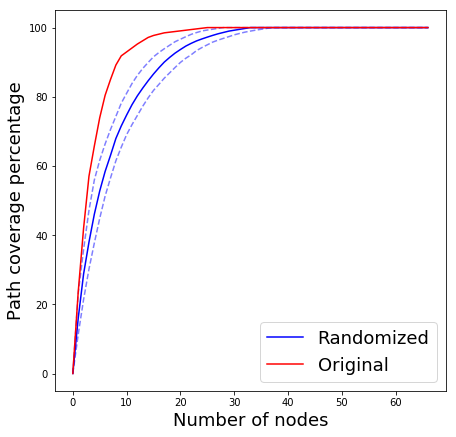

In [37]:
# plt.plot(np.percentile(runs['randomize_weight_length'],95,axis=0))
# plt.plot(np.percentile(runs['randomize_weight'],95,axis=0))
# plt.plot(np.percentile(runs['randomize_length'],95,axis=0))
plt.figure(figsize=(7,7))
plt.plot(np.percentile(runs['randomize_anatomy'],95,axis=0),'b--',alpha=0.5)
plt.plot(np.percentile(runs['randomize_anatomy'],5,axis=0),'b--',alpha=0.5)
plt.plot(np.percentile(runs['randomize_anatomy'],50,axis=0),'b',label='Randomized')
plt.plot(cdf,'r',label='Original')
plt.xlabel('Number of nodes',fontsize=18)
plt.ylabel('Path coverage percentage',fontsize=18)
plt.legend(fontsize=18)

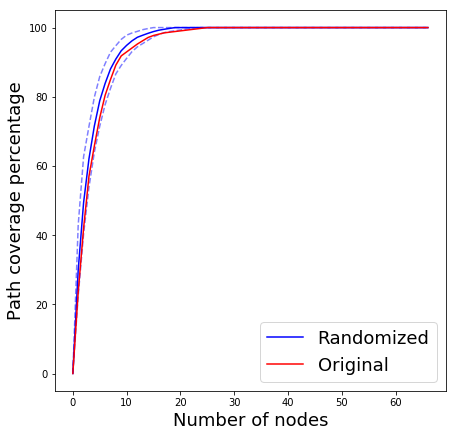

In [42]:
mode = 'randomize_weight_length'
plt.figure(figsize=(7,7))
plt.plot(np.percentile(runs[mode],95,axis=0),'b--',alpha=0.5)
plt.plot(np.percentile(runs[mode],5,axis=0),'b--',alpha=0.5)
plt.plot(np.percentile(runs[mode],50,axis=0),'b',label='Randomized')
plt.plot(cdf,'r',label='Original')
plt.xlabel('Number of nodes',fontsize=18)
plt.ylabel('Path coverage percentage',fontsize=18)
plt.legend(fontsize=18)

(0, 100)

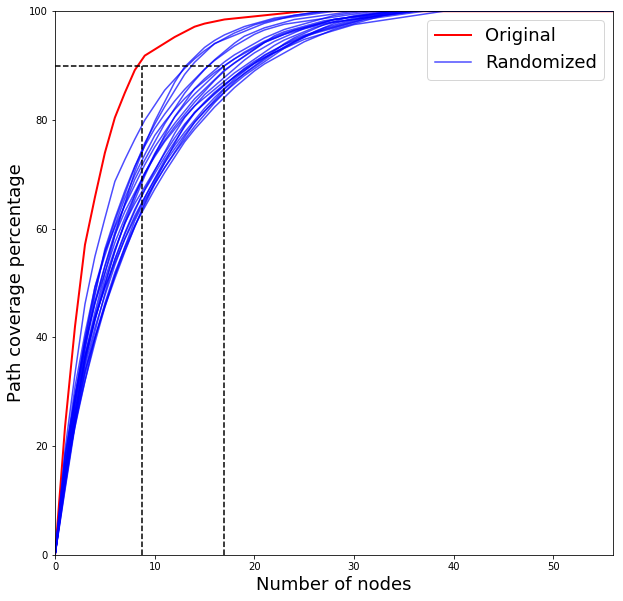

In [6]:
L = ALT(G)
thresholds = {'VISp':4,'AUDp':1,'GU':2.5,'SSp-ul':2.5,'SSp-tr':2.5,
              'SSp-m':4,'SSp-bfd':4,'SSp-ll':1.5,'SSp-n':0.98,'MOB':0.46}
srcs = ['SSp-n','AUDp','VISp','GU','SSp-ul','SSp-tr','SSp-m','SSp-bfd','SSp-ll','MOB']
for src in srcs:
    L.add_source(src)
    L.set_theta(src,0.98)
L.set_theta('MOB',0.46)
L.run()
L.form_paths()
pc = L.path_centrality()
core = L.core(100)
core90 = L.core(90)
ax = L.core_plot(core,67,label='Original')
for i in range(20):
    T = makeT()
    L = ALT(T)
    thresholds = {'VISp':4,'AUDp':1,'GU':2.5,'SSp-ul':2.5,'SSp-tr':2.5,
                  'SSp-m':4,'SSp-bfd':4,'SSp-ll':1.5,'SSp-n':0.98,'MOB':0.46}
    srcs = ['SSp-n','AUDp','VISp','GU','SSp-ul','SSp-tr','SSp-m','SSp-bfd','SSp-ll','MOB']
    for src in srcs:
        L.add_source(src)
        L.set_theta(src,0.98)
    L.set_theta('MOB',0.46)
    L.run()
    L.form_paths()
    pc = L.path_centrality()
    core1 = L.core(100)
    core190 = L.core(90)
    if i==1:
        L.core_plot(core1,67,ax,label='Randomized')
    else:
        L.core_plot(core1,67,ax)
ax.set_xlim([0,67-11])
ax.set_xlabel('Number of nodes',fontsize=18)
ax.set_ylabel('Path coverage percentage',fontsize=18)
ax.legend(fontsize=18)
ax.plot([0,17],[90,90],'k--')
ax.plot([8.7,8.7],[0,90],'k--')
ax.plot([17,17],[0,90],'k--')
ax.set_ylim([0,100])

In [18]:
for w in L.adags.values():
    print(w.order())

64
65
65
66
64
64
60
66
67
67
66


In [7]:
for w in L.adags.values():
    print(w.order())

67
67
67
67
67
67
67
67
67
67
67


In [18]:
2!=3

True

In [20]:
Z =set([2])
2 not in Z

False

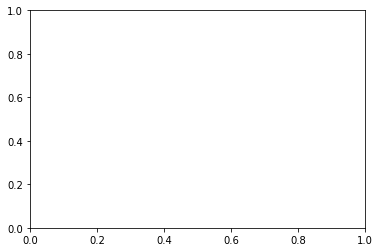

In [41]:
fig,ax = plt.subplots()

In [5]:
t = [1,2,3,4]
t[1:] = [0]*3

In [6]:
t

[1, 0, 0, 0]